# Lab 9

## Kishankumar Sathvara (8900065)

### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist as FM


(Images_train, Labels_train), (Images_test, Labels_test) = FM.load_data()

print("Images_train shape: ", Images_train.shape)
print("Labels_train shape: ", Labels_train.shape)
print("Images_test shape: ", Labels_test[0])

4422102/4422102 [==============================] - 0s 0us/step
Images_train shape:  (60000, 28, 28)
Labels_train shape:  (60000,)
Images_test shape:  9


In [2]:
print(f'Image Data Type: {type(Images_train)}')
print(f'Image Element Data Type: {type(Images_train[0,0,0])}')
print(f'Label Element Data Type: {type(Labels_train[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {Images_train.shape}')
print(f'Labels: {Labels_train.shape}')

print('Test Data:') 
print(f'Images: {Images_test.shape}')
print(f'Labels: {Labels_test.shape}')
print('Image Data Range:')
print(f'Min: {Images_train.min()}')
print(f'Max: {Images_train.max()}')

Image Data Type: <class 'numpy.ndarray'>
Image Element Data Type: <class 'numpy.uint8'>
Label Element Data Type: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


### Train Data

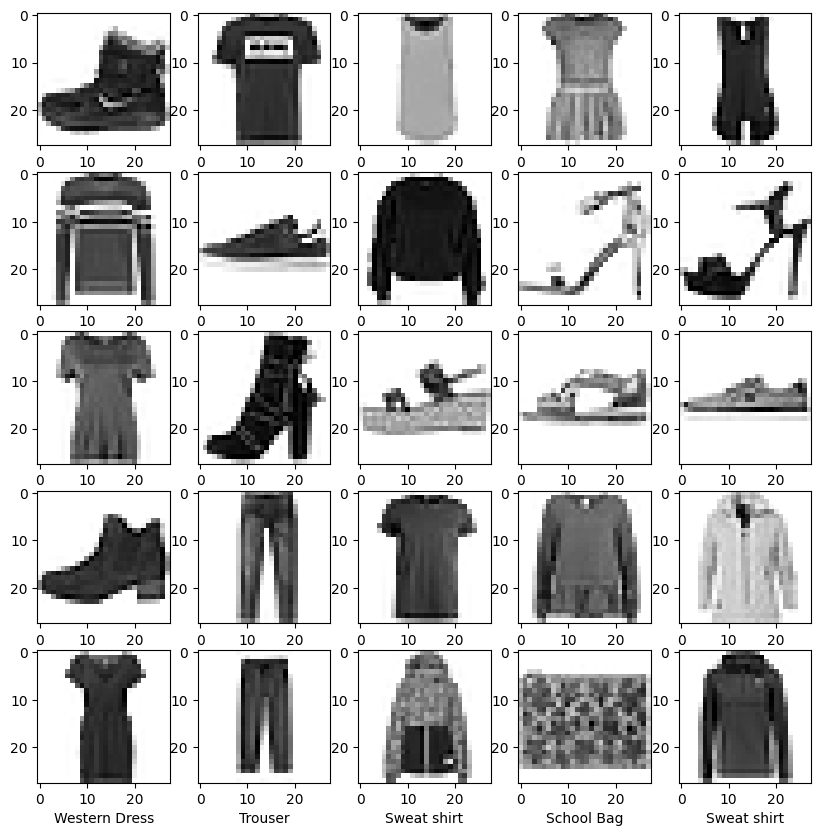

In [3]:
import matplotlib.pyplot as plt
labels={
    0:'Top',
    1:'Trouser',
    2:'hoodie',
    3:'Western Dress',
    4:'Sweat shirt',
    5:'Sandal',
    6:'Men Shirt',
    7:'Fancy Boot',
    8:'School Bag',
    9:'Boot'
}
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
   
    plt.imshow(Images_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[Labels_train[i]])

### Test Data

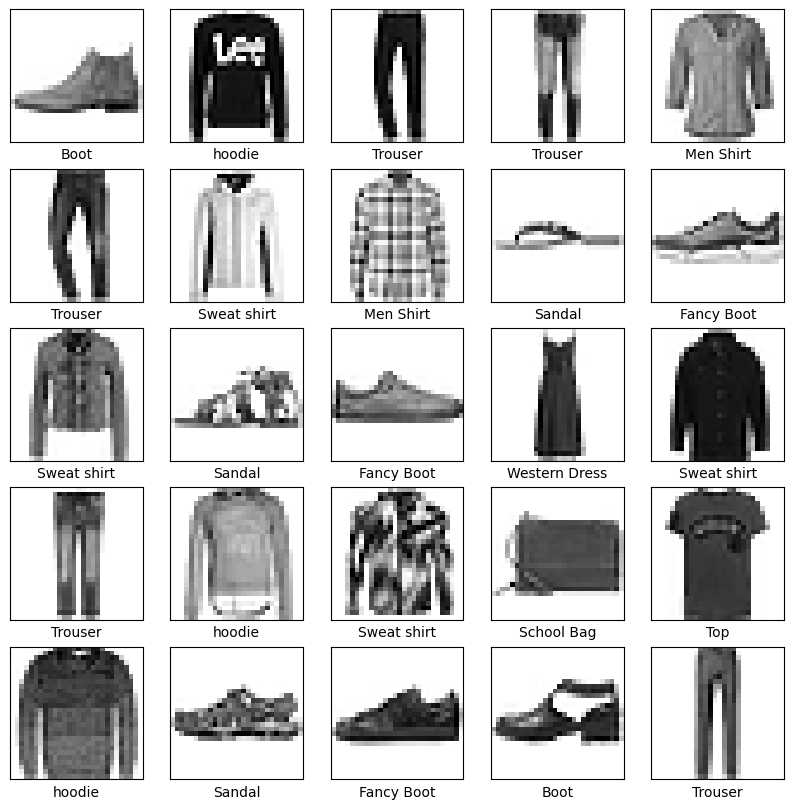

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(Images_test[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[Labels_test[i]])

In [5]:
Labels_train[9]

5

### Checking Length

In [6]:
print("Train datasets: ", len(Images_train))
print("Test datasets: ", len(Images_test))

Train datasets:  60000
Test datasets:  10000


In [7]:
Images_train = Images_train.reshape((60000, 28 * 28))  
Images_test = Images_test.reshape((10000, 28 * 28))

Images_train = Images_train.astype("float32") / 255  
Images_test = Images_test.astype("float32") / 255

### Train a dense neural network using Keras

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras import layers


M = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

M.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

M.fit(Images_train, Labels_train, epochs=10, batch_size=32, verbose=1)

score = M.evaluate(Images_test, Labels_test, verbose=0)
print('Loos Test:', score[0])
print('Accuracy Test:', score[1])

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4746 - accuracy: 0.8291
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3606 - accuracy: 0.8686
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3214 - accuracy: 0.8803
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2994 - accuracy: 0.8878
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2795 - accuracy: 0.8963
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2647 - accuracy: 0.9022
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2529 - accuracy: 0.9052
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2397 - accuracy: 0.9096
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2313 - accuracy: 0.9134
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

### Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
X_pred = M.predict(Images_test[9:10])

X_pred.argmax()

X_true = Labels_test

X_pred[0]
X_pred.argmax()

1/1 [==============================] - 0s 128ms/step


7

In [10]:
X_pred[0,7]

0.99999976

In [11]:
Labels_test[9]

7

### Confusion Matrix

In [12]:
X_test_pred = M.predict(Images_test)
X_pred_classes = np.argmax(X_test_pred,axis = 1)

X_pred_classes[0]

C_Matrix =tf.math.confusion_matrix(X_true, X_pred_classes, num_classes=10)
print(C_Matrix)

313/313 [==============================] - 1s 3ms/step
tf.Tensor(
[[803   1  16  12   1   0 163   0   4   0]
 [  4 975   2  12   3   0   3   0   1   0]
 [ 19   0 848  11  50   0  72   0   0   0]
 [ 38   5  14 868  36   0  36   0   3   0]
 [  3   0 171  25 742   0  59   0   0   0]
 [  0   0   0   1   0 961   0  17   1  20]
 [ 99   0  96  18  52   0 733   0   2   0]
 [  0   0   0   0   0   7   0 943   0  50]
 [  8   0   8   1   5   1  15   3 959   0]
 [  0   0   0   0   0   5   1  16   0 978]], shape=(10, 10), dtype=int32)


### Explaning the confusion Matrix.

##### The disarray grid compares the number of correct and wrong predictions generated by the grouping model to the actual information outputs (target values). The grid is NxN in size, with N representing the number of target values or classes. This grid is widely used to evaluate model performance. The table contains an example of a 2x2 disarray grid with positive and negative types.

### Print the incorrect data

Incorrect Predictions:  1190


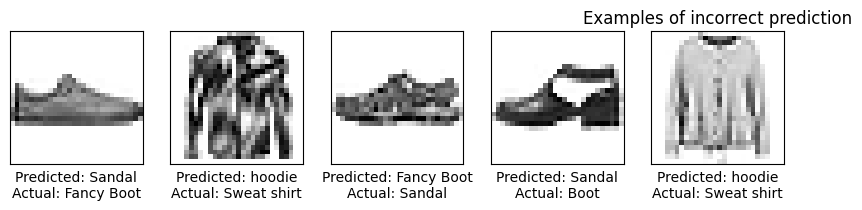

In [13]:
incorrects = np.nonzero( X_pred_classes != Labels_test)[0]
print("Incorrect Predictions: ", len(incorrects))

plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrects[:5]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Images_test[incorrect].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("Predicted: " + labels[X_pred_classes[incorrect]] + "\nActual: " + labels[Labels_test[incorrect]])
plt.title("Examples of incorrect prediction")
plt.show()